
# Introdução
---------------
Nessa avaliação realizaremos a manipulação de um grande arquivo de dados reais.
Trata-se de dados e estatísticas sobre economia mineral no Brasil gerados pelo Departamento Nacional de Produção Mineral, vinculado ao Ministério de Minas e Energia. Os dados utilizados estão disponíveis em [www.dnpm.gov.br](http://www.dnpm.gov.br/dnpm/publicacoes/serie-estatisticas-e-economia-mineral/estatisticas-e-economia-mineral "Estatísticas e Economia Mineral")

Mais especificamente, analisamos os dados referentes ao recolhimento do CFEM (Compensação Financeira pela Exploração de Recursos Minerais), acessíveis publicamente [aqui](https://app.dnpm.gov.br/DadosAbertos/ARRECADACAO/Cfem.csv).

Tarefa 1 - Leitura dos dados
---------


Na célula abaixo baixamos e implementamos uma função para leitura do arquivo CSV. A função retorna uma lista com os registros dos dados e uma outra lista que corresponde aos rótulos (nome das colunas). Essa função será utilizada nas próximas tarefas.
Depois, a função implementada <code>le_dados</code> é testada imprimindo os rótulos, a primeira linha dos dados e o número total de registros.



In [2]:
# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo. 
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica. 
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    file = open(filename, 'r', encoding='ISO-8859-1')
    
    # Criando uma lista vazia para armazenar todos os dados do arquivo
    dados = []
    
    # Para cada linha do arquivo, realizamos as seguintes operacoes: 
    # (1) removemos o caractere '\n' do final da linha
    # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
    # (3) removemos as aspas extras
    # (4) transformamos a linha em uma lista
    # (5) adicionamos a lista de itens na lista 'dados'
    for line in file:
        dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
        
    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)
    
    return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############
rotulos, dados = le_dados("Cfem.csv")

print (rotulos)
print (dados[0])
print ("Número total de registros: %d" % (len(dados)))


['Ano de Referencia', 'Mes de Referencia', 'Processo', 'Ano do Processo', 'Tipo PF/PJ', 'CPF/CNPJ', 'Pessoa Física/Jurídica', 'Fase do Processo', 'Substância', 'Uf', 'Município', 'Unidade de Medida', 'Quantidade Comercializada', 'Valor Recolhido (CFEM)']
['2002', '6', '', '', 'PF', '***.000.000-**', 'Não Informado', '', '', '', '', '', '', '31']
Número total de registros: 1219475


In [38]:
dados[56456][-1]

'3482,07'

Tarefa 2 - Evolução da arrecadação ao longo dos anos
---------

Na célula abaixo implementamos duas funções que são utilizadas para gerar um gráfico da arrecadação do Cfem ao longo dos anos.


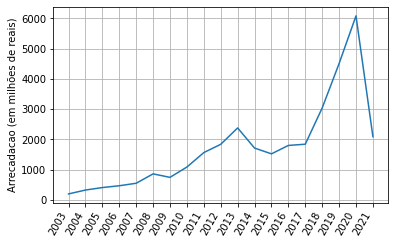

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Funcao que recebe um conjunto de dados sobre mineracao
# - retorna uma lista de tuplas com a soma de arrecadacao (Cfem) a cada cada ano
def arrecadacao_por_ano(dados):
    
    # Criando um dicionario vazio
    arrecadacao = {}
    
    # Computando a soma dos valores a cada ano
    for l in dados:
        arrecadacao[l[0]] = arrecadacao.get(l[0], 0.0 ) + float(l[-1].replace(',','.'))
    
    # Convertendo o dicionario gerado em uma lista de tuplas ordenada pelo ano
    lista = []
    for ano,valor in arrecadacao.items():
        lista.append((ano,valor))
    lista.sort()
    
    return (lista)

# Plota um grafico com a serie temporal dos dados de arrecadacao de mineracao
# Entrada: lista de tuplas com a soma de arrecadacao (Cfem) a cada cada ano
def plota_serie(lista):
    
    x = []
    y = []
    
    for l in lista:
        x.append(l[0])
        y.append(l[1]/(10**6)) # Dividindo por 1 milhao para facilitar a representação

    x.pop(0)
    y.pop(0)

    fig, ax = plt.subplots()
    fig.autofmt_xdate()    
    
    plt.plot(x,y)
    plt.ylabel('Arrecadacao (em milhões de reais)')
    plt.xticks(rotation=60)
    plt.grid(True)
    
    plt.show() 

############# BLOCO PRINCIPAL DO PROGRAMA #############    

plota_serie(arrecadacao_por_ano(dados))


Tarefa 3 - Extração de ouro por estado entre 2008 e 2018
---------

Na célula abaixo foram implementadas duas funções que são utilizadas para gerar um gráfico que mostra a extração de ouro por estado brasileiro entre os anos de 2008 e 2018. 

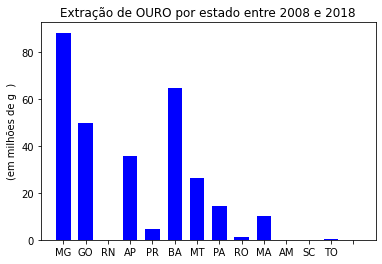

In [4]:
# Funcao que recebe um conjunto de dados sobre mineracao; um minerio especifico; em um periodo (intervalo de anos)
# - retorna a quantidade do minerio extraido por estado ou 'None' para um intervalo invalido
def extracao_minerio_por_estado(dados, minerio, ano_inicio, ano_fim):
    
    # Criando um dicionario vazio
    prod_estado = {}
    
    # Verificando se o período indicado é válido
    if ano_fim < ano_inicio:
        return None

    for l in dados:
        ano = int(l[0])
        if ano >= ano_inicio and ano <= ano_fim:
            if minerio == l[8] and l[-1] != '':
                prod_estado[l[9]] = prod_estado.get(l[9], 0.0 ) + float(l[-1].replace(',','.'))
                unidade = l[11]
    
    return prod_estado, unidade


# Funcao que recebe um conjunto de dados sobre mineracao; um minerio especifico; em um periodo (intervalo de anos)
# Plota um histograma da producao do estado
def plota_histograma(dados, minerio, ano_inicio, ano_fim):
    
    dict,un = extracao_minerio_por_estado(dados, minerio, ano_inicio, ano_fim)
    
    fig, ax = plt.subplots()

    list = []
    keys = []
    for k,v in dict.items():
        list.append(float(v)/(10**6)) # Milhoes
        keys.append(k)
    
    ind = np.arange(len(list))  # the x locations for the groups
    width = 0.65       # the width of the bars        
    
    rects1 = ax.bar(ind, list, width, color='b')
    
    ax.set_xticks(ind)
    ax.set_xticklabels(keys)
    ax.set_title('Extração de ' + minerio + ' por estado entre ' + str(ano_inicio) + ' e ' +  str(ano_fim))

    plt.ylabel('(em milhões de ' + un + ')')
    
    plt.show()
    
############# BLOCO PRINCIPAL DO PROGRAMA #############        
plota_histograma(dados,"OURO", 2008, 2018)


Tarefa 4 - Extração de ferro por estado nos anos de 2014 a 2019.
---------

**Agora é sua vez!** Utilize as funções já implementadas para gerar um gráfico de barras que mostra a extração de ferro por estado nos anos de 2014 a 2019 na célula abaixo.

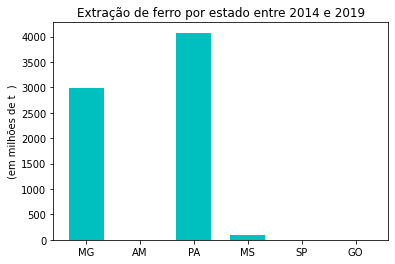

In [5]:
#função para gerar um gráfico de barras que mostra a extração de ferro por estado nos anos de 2014 a 2019 e o valor da unidade
def plota_barra_ferro(dados, ano_inicio, ano_fim):
    dict,un = extracao_minerio_por_estado(dados, "FERRO", ano_inicio, ano_fim)
    list = []
    keys = []
    for k,v in dict.items():
        list.append(float(v)/(10**6)) # Milhoes
        keys.append(k)
    ind = np.arange(len(list))  
    
    fig, ax = plt.subplots()
    width = 0.65      
    rects1 = ax.bar(ind, list, width, color='c')
    ax.set_xticks(ind)
    ax.set_xticklabels(keys)
    ax.set_title('Extração de ferro por estado entre ' + str(ano_inicio) + ' e ' +  str(ano_fim))
    plt.ylabel('(em milhões de ' + un + ')')
    plt.show()

plota_barra_ferro(dados, 2014, 2019)



Tarefa 5 - Evolução da extração de areia em Minas Gerais.
---------

**Mais uma tarefa!** Implemente funções para plotar um gráfico de linhas que mostra a evolução da extração de areia em Minas Gerais. Sugestão: copie e altere as funções <code>arrecadacao_por_ano</code> e <code>plota_serie</code> implementadas na Tarefa 1. Utilize as funções que você implementou para plotar o gráfico final.

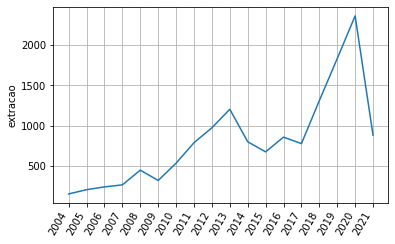

In [50]:
##função para gerar um gráfico de serie que mostra a extração de areai em minas gerais.
def extracao_por_ano_areia_minasgerais(dados):
    
    # Criando um dicionario vazio
    extracao = {}
    
    # Computando a soma dos valores a cada ano
    
    for l in dados:
        #se estado for igual a minas gerais, armazena o valor da extração
        if l[9] == 'MG':
            extracao[l[0]] = extracao.get(l[0], 0.0 ) + float(l[-1].replace(',','.'))
            
            
    
    """ print(extracao) """
    # Convertendo o dicionario gerado em uma lista de tuplas ordenada pelo ano
    lista = []
    for ano,extracao in extracao.items():
        lista.append((ano,extracao))
    lista.sort()
    
    return (lista)

# Plota um grafico com a serie temporal dos dados de extracao de mineracao
# Entrada: lista de tuplas com a soma de extracao (Cfem) a cada cada ano
def plota_serie_areia_minasgerais(lista):
    
    x = []
    y = []
    
    for l in lista:
        x.append(l[0])
        y.append(l[1]/(10**6))

    x.pop(0)
    y.pop(0)

    fig, ax = plt.subplots()
    fig.autofmt_xdate()    
    
    plt.plot(x,y)
    plt.ylabel('extracao')
    plt.xticks(rotation=60)
    plt.grid(True)
    
    plt.show() 

############# BLOCO PRINCIPAL DO PROGRAMA #############    
""" 
new_dados = dados[1:200000]

print(extracao_por_ano_areia_minasgerais(new_dados)) """

plota_serie_areia_minasgerais(extracao_por_ano_areia_minasgerais(dados))


Tarefa 6 - Percentual de arrecadação do Estado de Minas Gerais no ano de 2016 por tipo de minério extraído.
---------

**Última tarefa!** Implemente funções para plotar um gráfico de "pizza" que mostra o percentual de arrecadação de cada tipo de minério extraído no Estado de Minas Gerais no ano de 2016. Utilize as funções que você implementou para plotar o gráfico final. Sugestão: use os exemplos da documentação do matplotlib para fazer o gráfico: [Basic Pie Chart!](http://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py")


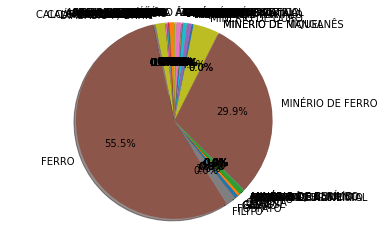

In [51]:
#plotar um gráfico de "pizza" que mostra o percentual de arrecadação de cada tipo de minério extraído no Estado de Minas Gerais no ano de 2016
def plota_pizza_minasgerais(dados):
    # Criando um dicionario vazio
    extracao = {}
    
    # Computando a soma dos valores a cada ano
    
    for l in dados:
        #se estado for igual a minas gerais, armazena o valor da extração
        if l[9] == 'MG':
            if l[0] == '2016':
                extracao[l[8]] = extracao.get(l[8], 0.0 ) + float(l[-1].replace(',','.'))
            
    
    # Convertendo o dicionario gerado em uma lista de tuplas ordenada pelo ano
    lista = []
    for minerio,extracao in extracao.items():
        lista.append((minerio,extracao))
    lista.sort()
    
    return (lista)

def grafico_pizza(lista):
    x = []
    y = []
    for l in lista:
        x.append(l[0])
        y.append(l[1]/(10**6)) # Dividindo por 1 milhao para facilitar a representação
    x.pop(0)
    y.pop(0)
    plt.pie(y, labels=x, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.show()

grafico_pizza(plota_pizza_minasgerais(dados))

